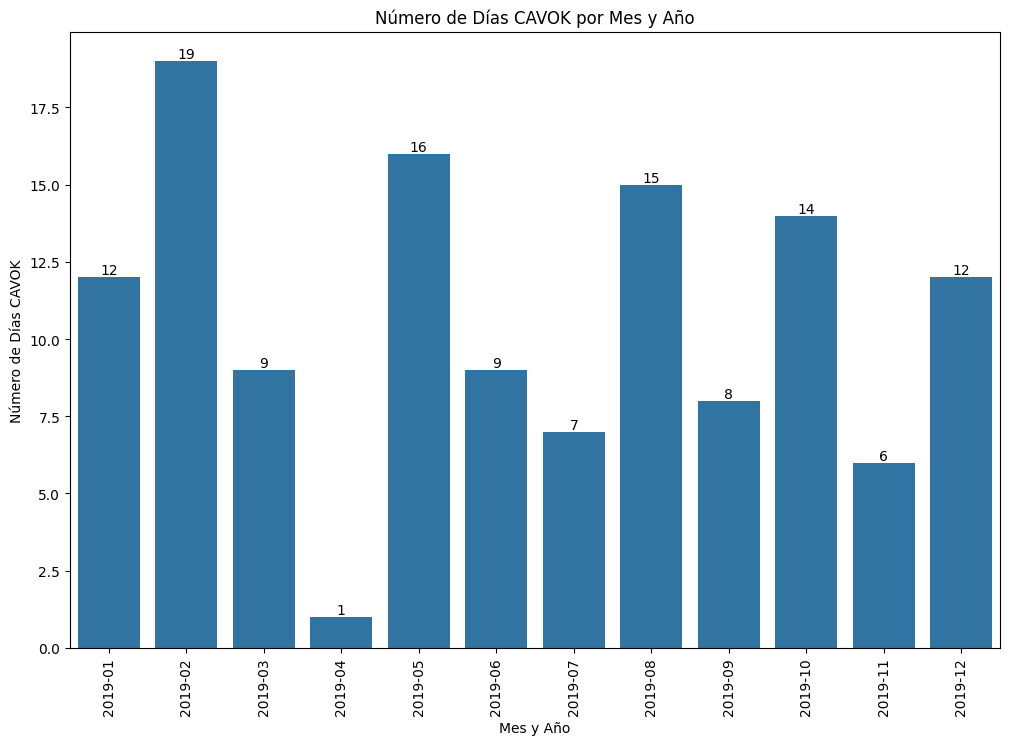

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('GCLP_All.csv')

# Convertir la columna dateTime a tipo datetime para extraer la fecha (sin tiempo)
data['dateTime'] = pd.to_datetime(data['dateTime']).dt.date

# Extraer el mes y el año para agrupar por ellos
data['Month'] = pd.to_datetime(data['dateTime']).dt.month
data['Year'] = pd.to_datetime(data['dateTime']).dt.year

# Suponiendo que la columna CAVOK indica 1 si el día fue CAVOK y 0 de lo contrario
data['CAVOK'] = data['CAVOK'].fillna(0).astype(int)
daily_cavok = data.groupby(['Year', 'Month', 'dateTime'])['CAVOK'].max().reset_index()

# Agrupar por año y mes para contar los días CAVOK, asegurándose de convertir los sumatorios a enteros
monthly_cavok = daily_cavok.groupby(['Year', 'Month'])['CAVOK'].sum().reset_index()

# Preparar los datos para el gráfico
monthly_cavok['Year_Month'] = monthly_cavok['Year'].astype(str) + '-' + monthly_cavok['Month'].astype(str).str.zfill(2)

# Gráfico de barras
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=monthly_cavok, x='Year_Month', y='CAVOK')
plt.title('Número de Días CAVOK por Mes y Año')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Días CAVOK')
plt.xticks(rotation=90)  # Rotar las etiquetas para mejor visualización

# Añadir etiquetas a cada barra
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', color='black')

plt.show()
